In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [151]:
pumpkins = pd.read_csv('pumpkin.csv')
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


By the bushel

In [152]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [153]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [154]:
columns =  ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins[columns]
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,10/8/16
...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,9/30/16
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,9/30/16
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,9/30/16
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,9/30/16


Find Average Price for a given month

In [155]:
pumpkins['Price'] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] /= (1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] /= (1/2)
pumpkins['Date'] = pd.to_datetime(pumpkins['Date'])
pumpkins['Month'] = pumpkins['Date'].dt.month
pumpkins['DayOfYear'] = pumpkins['Date'].dt.dayofyear
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date,Price,Month,DayOfYear
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,2016-09-24,13.50,9,268
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,2016-09-24,16.20,9,268
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,2016-10-01,16.20,10,275
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,2016-10-01,15.30,10,275
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,2016-10-08,13.50,10,282
...,...,...,...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,2016-09-30,30.00,9,274
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,2016-09-30,28.75,9,274
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,2016-09-30,25.75,9,274
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,2016-09-30,24.00,9,274


In [156]:
def average_given_month(df, month):
    avg = df[df['Month'] == month][['Price']].mean()
    return pd.DataFrame({"Average":avg})

In [157]:
avg = average_given_month(pumpkins,9)
avg

,Average
Price,28.544384


Visualizing

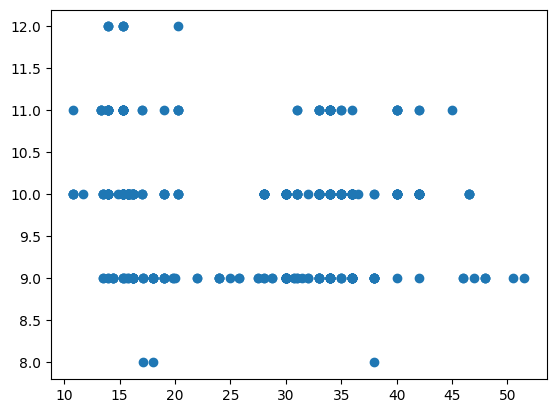

In [158]:
price = pumpkins.Price
month = pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

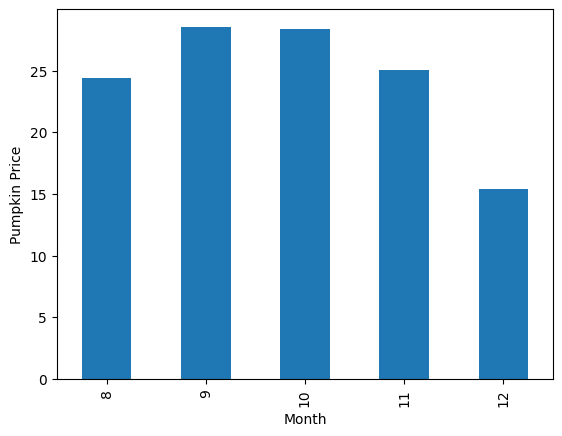

In [159]:
pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

<function matplotlib.pyplot.show(close=None, block=None)>

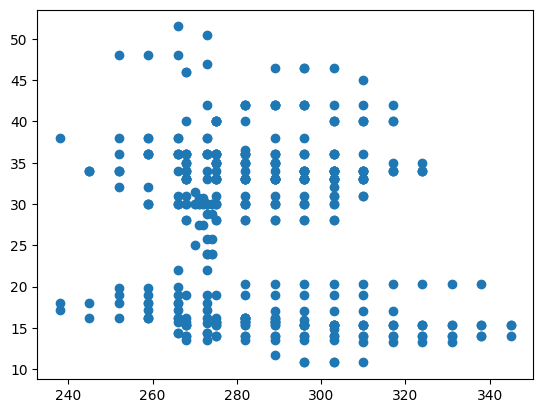

In [160]:
plt.scatter('DayOfYear','Price',data=pumpkins)
plt.show

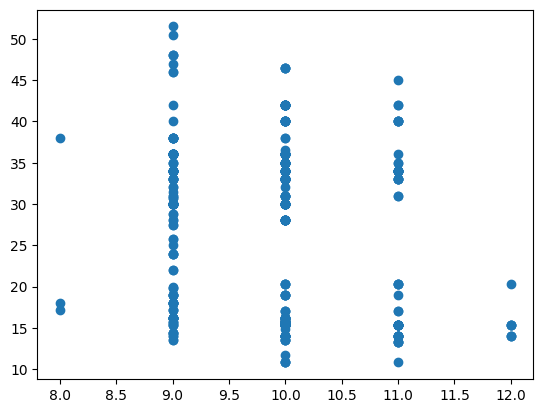

In [161]:
plt.scatter('Month','Price',data=pumpkins)
plt.show()